In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd

# Latex style
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=16)
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


### Task 1 - Energy vs. Lattice Volume

The lattice parameter value generating the minimum energy is 3.979 Å


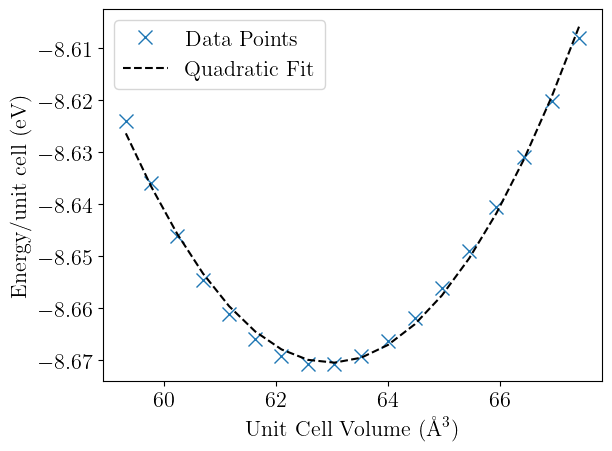

In [ ]:
data = np.loadtxt('data/task_1/energies.csv', delimiter=',')
plt.plot(np.pow(data[:, 0], 3), data[:, 1] / 64, 'x', ms=10, label='Data Points')

fit = np.polyfit(np.pow(data[:, 0], 3), data[:, 1] / 64, 2)
plt.plot(np.pow(data[:, 0], 3), np.polyval(fit, np.pow(data[:, 0], 3)), 'k--', label='Quadratic Fit')

print(f'The lattice parameter value generating the minimum energy is {np.pow(-fit[1] / (2 * fit[0]), 1/3):.3f} Å')

plt.xlabel('Unit Cell Volume (Å$^3$)')
plt.ylabel('Energy/unit cell (eV)')

plt.legend()
plt.tight_layout()
plt.show()

### Task 2 - Energy Conservation and Temperature

In [14]:
def read_data_task_2_3(delta_t, its, its_eq, task):
    if task == 2:
        filename = f'data/task_2/data_{delta_t:.3f}_{its:.0f}_{its_eq:.0f}.csv'
    elif task == 3:
        filename = f'data/task_3/data_{delta_t:.3f}_{its:.0f}_{its_eq:.0f}.csv'

    data = np.genfromtxt(filename, dtype=np.float64, encoding=None, delimiter=',')
    its, t_max, delta_t, its_eq = data[1,0], data[1,1], data[1,2], data[1,3]

    return data[3:, :], int(its), t_max, delta_t, int(its_eq)

def init_fig_task_2(delta_t):
    fig, axs = plt.subplots(2, 2, figsize=(12, 7), sharex=True)
    fig.subplots_adjust(hspace=0.05)  # adjust space between Axes
    ax1, ax2, ax3, ax4 = axs[0][0], axs[1][0], axs[0][1], axs[1][1]
    ax3.set_visible(False)
    ax4.set_visible(False)

    ax1_2 = fig.add_subplot(1, 2, 1, frameon=False)
    ax1_2.set_ylabel('Energy (eV)', labelpad=50)
    ax1_2.set_xticks([])
    ax1_2.set_yticks([])

    ax3 = fig.add_subplot(1, 2, 2)
    ax3.set_ylabel('Temperature (K)', labelpad=10)
    plt.suptitle(f'\\textbf{{Energies and Temperature vs. time $\\vert \\hspace{{0.3cm}}\\Delta t = {delta_t}$ ps}}')

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

    ax1.spines.bottom.set_visible(False)
    ax2.spines.top.set_visible(False)
    #ax1.xaxis.tick_top()
    #ax1.tick_params(labeltop=False)  # don't put tick labels at the top

    return fig, ax1, ax2, ax3, ax4

def plot_data_task_2(data, its, t_max, delta_t):
    t = np.linspace(0, t_max, int(its))
    E_k_min, E_k_max = np.min(data[1:, 0]), np.max(data[1:, 0])
    E_p_min, E_p_max = np.min(data[1:, 1]), np.max(data[1:, 1])

    fig, ax1, ax2, ax3, ax4 = init_fig_task_2(delta_t)
    ax1.plot(t, data[1:, 0], label='Kinetic Energy')
    ax1.plot(t, data[1:, 1], label='Potential Energy')
    ax1.plot(t, data[1:, 2], label='Total Energy')
    ax2.plot(t, data[1:, 0], label='Kinetic Energy')
    ax2.plot(t, data[1:, 1], label='Potential Energy')
    ax2.plot(t, data[1:, 2], label='Total Energy')
    # ax1.set_ylim(E_k_max - 0.75 * (E_k_max - E_k_min), E_k_max + 0.5 * (E_k_max - E_k_min))
    # ax2.set_ylim(E_p_min - 0.1 * (E_p_max - E_p_min), E_p_max + 0.4 * (E_p_max - E_p_min))

    ax3.plot(t, data[1:, 3], label='Temperature', color='tab:red')

    for ax in (ax1, ax2, ax3):
        if ax == ax3:
            ax.set_ylabel('Temperature (K)')
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis='both', direction='in', length=5, width=1, colors='black')
        ax.tick_params(axis='both', which='minor', direction='in', length=3, width=1, colors='black')

    ax1.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False)
    ax2.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax1.legend(fontsize=12, loc='upper right')
    ax3.legend(fontsize=12, loc='upper right')
    plt.tight_layout()
    plt.show()

t_max = 10
its_eq = 0
# data_01, its_01, t_max_01, delta_t_01, _ = read_data_task_2_3(0.1, t_max/0.1, 0)
# data_005, its_005, t_max_005, delta_t_005, _ = read_data_task_2_3(0.02, t_max/0.02, 0)
# data_0001, its_0001, t_max_0001, delta_t_0001, _ = read_data_task_2_3(0.001, t_max/0.001, 0)

# plot_data_task_2(data_01, its_01, t_max_01, delta_t_01)
# plot_data_task_2(data_005, its_005, t_max_005, delta_t_005)
# plot_data_task_2(data_0001, its_0001, t_max_0001, delta_t_0001)

### Task 3 - Pressure and Temperature

(-10.0, 10.0)

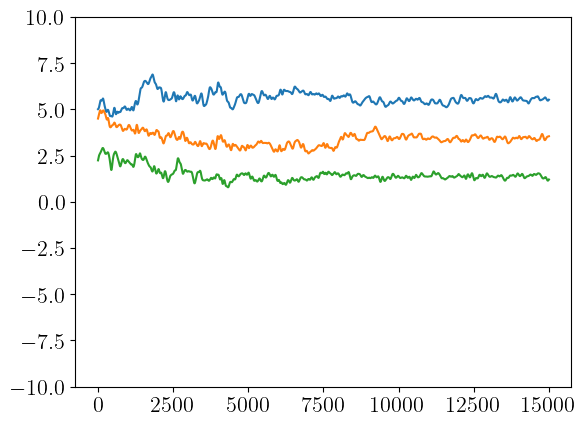

In [18]:
data, its, t_max, delta_t, its_eq,  = read_data_task_2_3(0.001, 40000, 25000, 3)

# Col 1 = Kinetic Energy, Col 2 = Potential Energy, Col 3 = Total Energy, 
# Col 4 = Temperature AVG, Col 5 = Instantaneous Temperature, Col 6 = Pressure AVG,
# Col 7 = Instantaneous Pressure, Col 8 = Lattice Parameter

def read_trajs(data, its, delta_t, its_eq):
    filename = f'data/task_3/trajs_{delta_t:.3f}_{its:.0f}_{its_eq:.0f}.csv'
    trajs = np.genfromtxt(filename, dtype=np.float64, encoding=None, delimiter=',')

    return trajs

def plot_T_P(data, its_eq):
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
    ax2 = ax1.twinx()
    ax1.plot(data[:its_eq, 3], color='tab:red', label='Temperature')
    ax2.plot(data[:its_eq, 5], color='tab:blue', label='Pressure')
    ax1.set_ylabel('Temperature (K)')
    ax2.set_ylabel('Pressure (GPa)')
    ax2.set_ylim(0, 0.001)
    ax1.set_xlabel('Time (ps)')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

trajs = read_trajs(data, its, delta_t, its_eq)

# plt.plot(data[:, 6], label='Pressure')
# plot_T_P(data, its_eq)
# plot_data_task_2(data[its_eq:, :], its - its_eq -1, t_max, delta_t)

plt.plot(trajs[its_eq:, 0], label='x_1')
plt.plot(trajs[its_eq:, 1], label='y_1')
plt.plot(trajs[its_eq:, 2], label='z_1')

plt.ylim(-10, 10)

Text(0, 0.5, 'Unit Cell Volume [Å$^3$]')

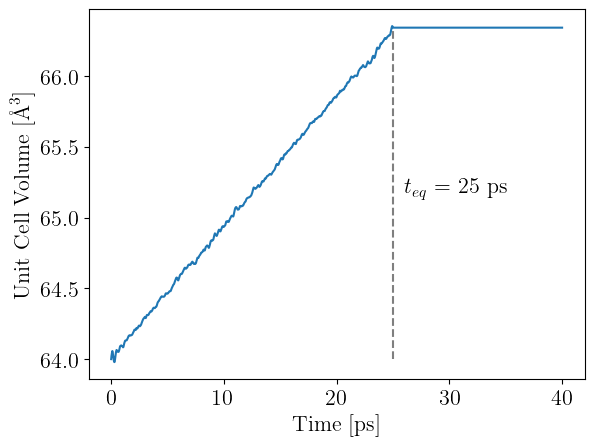

In [ ]:
volume_unit_cell = np.pow(data[:, 7], 3)

t = np.linspace(0, t_max, its)


plt.plot(t,volume_unit_cell)

plt.vlines(its_eq * delta_t, volume_unit_cell[0],volume_unit_cell[its_eq], color='k', linestyle='--', label='Equilibration Time',alpha=0.5) 
plt.text((its_eq + 1000) * delta_t, (volume_unit_cell[0] + volume_unit_cell[its_eq])/2, '$t_{eq}$ = 25 ps', ha='left')

plt.xlabel('Time [ps]');
plt.ylabel('Unit Cell Volume [Å$^3$]')

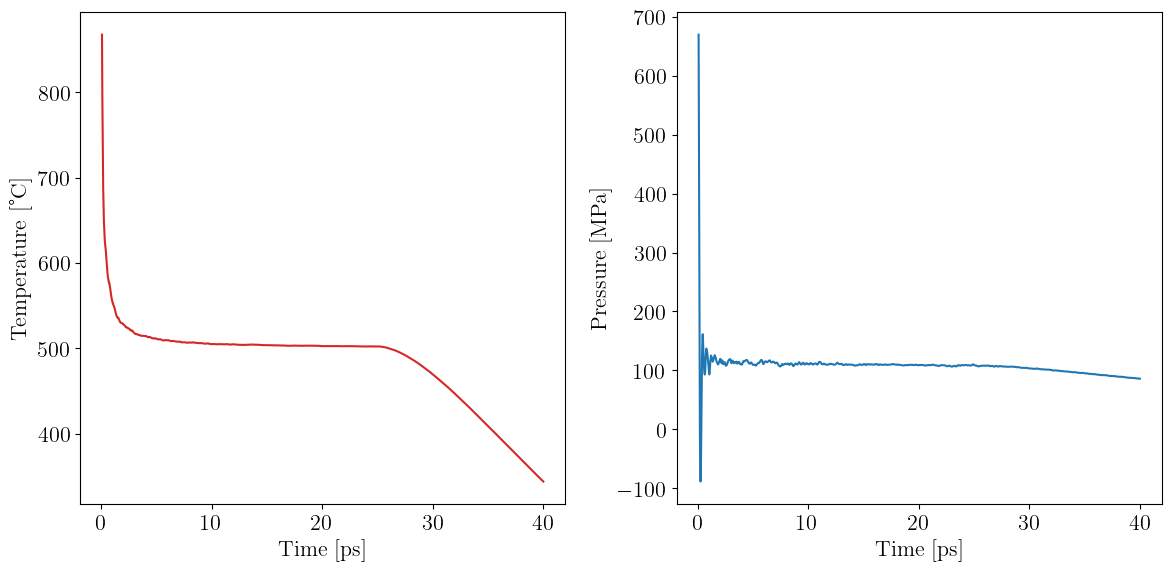

In [47]:
Temp_avg = data[:, 3] - 273.15
Pressure_avg = data[:, 5]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(t[100:], Temp_avg[100:], color='tab:red', label='Temperature')
ax[1].plot(t[100:], Pressure_avg[100:], color='tab:blue', label='Pressure')
ax[0].set_ylabel('Temperature [°C]')
ax[1].set_ylabel('Pressure [MPa]')
ax[0].set_xlabel('Time [ps]')
ax[1].set_xlabel('Time [ps]')

plt.tight_layout()